In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from keras.utils import np_utils 
import tqdm
from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle

In [32]:
n_samples_per_center=[30,30,30] #クラスターのそれぞれのデータ数
n_features=2
clust_number=3 #クラスターの数
center_box=(-10,10)

In [48]:
#centers=generator.uniform(center_box[0],center_box[1],size=(clust_number,n_features)) #(クラスターの中心の範囲,size(クラスターの中心数，特徴量))
centers=np.array([[-7.5,-7.5],[7.5,7.5],[9,-7.5]])

In [50]:
#cluster_std=np.full(len(centers),1.0) #(クラスターの中心数,クラスター内標準偏差)
cluster_std=np.array([0.1,0.5,1.0])

In [51]:
cum_sum_n_samples = np.cumsum(n_samples_per_center) #累積和の配列を作る
cum_sum_n_samples

array([30, 60, 90])

In [52]:
X = np.empty(shape=(sum(n_samples_per_center), n_features), dtype=np.float64)
y = np.empty(shape=(sum(n_samples_per_center),), dtype=int)

In [53]:
for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        start_idx = cum_sum_n_samples[i - 1] if i > 0 else 0
        end_idx = cum_sum_n_samples[i]
        X[start_idx:end_idx] = generator.normal(
            loc=centers[i], scale=std, size=(n, n_features)
        )
        y[start_idx:end_idx] = i


In [54]:
X, y = shuffle(X, y, random_state=generator)

Text(0, 0.5, 'Feature 2')

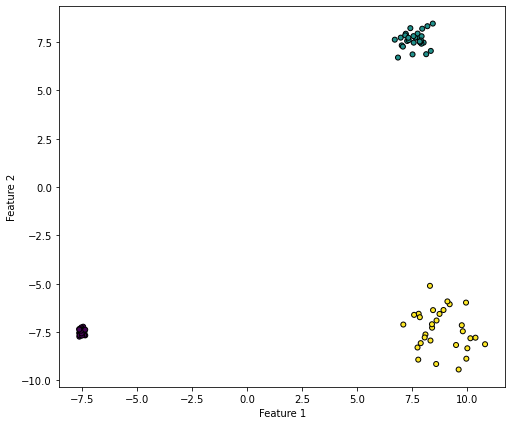

In [55]:
plt.figure(figsize=(8, 7))
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [56]:
centers

array([[-7.5, -7.5],
       [ 7.5,  7.5],
       [ 9. , -7.5]])